# Data Exploration

# 1.Path

Make sure where the data to be examined is stored on the computer

In [1]:
from ipywidgets import interactive
import os
MAIN_DIR = 'sources'

def getSubFolder(subfoldername):
    return os.path.join(w.result, subfoldername).replace("\\","/")


def getPath(filename):
    result = os.path.join(MAIN_DIR, filename).replace("\\","/")
    global w2
    w2 = interactive(getSubFolder,subfoldername=os.listdir(result))
    return result
    
w = interactive(getPath,filename=os.listdir(MAIN_DIR))


Choose the right folder

In [2]:
display(w)

interactive(children=(Dropdown(description='filename', options=('sample_1',), value='sample_1'), Output()), _d…

Choose the right subfolder

In [3]:
display(w2)

interactive(children=(Dropdown(description='subfoldername', options=('original',), value='original'), Output()…

Checking whether the data was found correctly

In [4]:
w2.result

'sources/sample_1/original'

Check if all your data/classes were rocognized

In [5]:
path = w2.result

import os

directory_contents = os.listdir(path)
beaver_id = []

for n in range(0,len(directory_contents)):
    beaver_id.append(directory_contents[n])

# Sorting list of Integers in ascending
beaver_id.sort(key=int)

print(beaver_id)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']


# 2. Images Counter

Counts all the images. Make sure all images are saved as jpg

In [6]:
import glob
jpgCounter = []
totalDir = 0

for base, dirs, files in os.walk(path):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    jpgCount = len(glob.glob1(base,"*.jpg"))
    jpgCounter.append(jpgCount)
    print('number of jpg :', jpgCount)
del jpgCounter[0] # delete first index

print('Total Number of directories',totalDir)
print('Total Number of jpg',sum(jpgCounter))

Searching in :  sources/sample_1/original
number of jpg : 0
Searching in :  sources/sample_1/original\1
number of jpg : 4
Searching in :  sources/sample_1/original\10
number of jpg : 4
Searching in :  sources/sample_1/original\11
number of jpg : 4
Searching in :  sources/sample_1/original\12
number of jpg : 4
Searching in :  sources/sample_1/original\13
number of jpg : 4
Searching in :  sources/sample_1/original\14
number of jpg : 4
Searching in :  sources/sample_1/original\15
number of jpg : 4
Searching in :  sources/sample_1/original\16
number of jpg : 4
Searching in :  sources/sample_1/original\17
number of jpg : 4
Searching in :  sources/sample_1/original\18
number of jpg : 4
Searching in :  sources/sample_1/original\19
number of jpg : 4
Searching in :  sources/sample_1/original\2
number of jpg : 4
Searching in :  sources/sample_1/original\20
number of jpg : 4
Searching in :  sources/sample_1/original\21
number of jpg : 4
Searching in :  sources/sample_1/original\22
number of jpg :

# 3. Graph Data Counter

Graphic representation/overview of the pictures per class. Check if all images are recognized and every class has the correct number of images

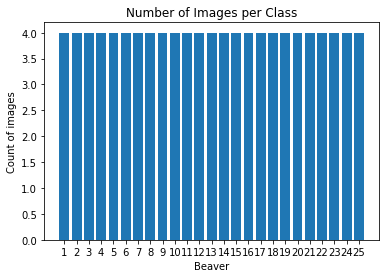

In [7]:
import matplotlib.pyplot as plt

# Create a List of Labels for x-axis
names = beaver_id

# Create a List of Values (Same Length as Names List)
samples = jpgCounter

# Make the Chart
plt.bar(names, samples)

# Title
plt.title('Number of Images per Class')

# X and y labels
plt.xlabel("Beaver")
plt.ylabel("Count of images")

# Show the Chart
plt.show()

Here are some of beaver photos from dataset

# 4. Image Visualization

Provides some images again for visualization. To check whether the data is correct

In [8]:
from matplotlib import pyplot
from matplotlib.image import imread
import os
import random


def plot_image(path,n):
    
    image_list = []

    # read the entries
    with os.scandir(path) as listOfEntries:
        for entry in listOfEntries:
            # print all entries that are files
            if entry.is_file():
                #print(entry.name)
                image_list.append(entry.name)


    # filter only jpg or png files
    image_list = list(filter(lambda k: ('jpg' or 'png') in k, image_list))
    image_list.sort()
    pyplot.figure(figsize=(10, 10))
    # plot all images
    for i in range(n):
        random_num = random.randint(0, len(image_list)-1)
        # define subplot
        pyplot.subplot(2,3, i+1)
        # define filename
        filename = path + '/' + image_list[random_num]
        # show image name
        pyplot.title(image_list[random_num])
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        pyplot.imshow(image)
    # show the figure
    pyplot.show()

Here are some of random picture of beaver 1:

Beaver 1


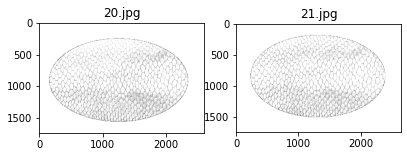

In [9]:
print('Beaver 1')
plot_image(path+'/1',2)

Here are some of random picture of beaver 2:

Beaver 2


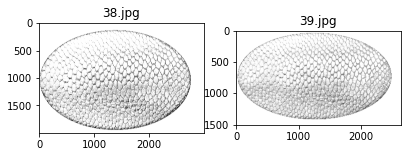

In [10]:
print('Beaver 2')
plot_image(path+'/2',2)

Here are some of random picture of beaver 3:

Beaver 3


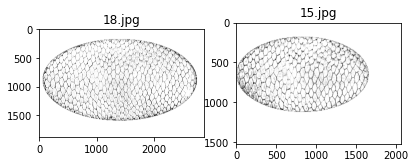

In [11]:
print('Beaver 3')
plot_image(path+'/3',2)

# 5. Create a dataset

It's good practice to use a validation split when testing the algorihtm. Let's use 80% of the images for data base, and 20% for testing.

Create a dataset directories of train and test

Gathers the amount of data for the exercise and for the actual test

In [12]:
# importing os module
import os
# create subdirectories
subdirs = ['data_base/', 'test/']
data_path = path.split("/")
print(data_path)
for subdir in subdirs:
    # create label subdirectories
    for labldir in beaver_id:
        newdir = os.path.join(data_path[0],data_path[1], subdir,labldir)
        os.makedirs(newdir, exist_ok=True)

['sources', 'sample_1', 'original']


Move each files randomly to train or test directories

In [14]:
import random
from shutil import copyfile
from os import listdir

# seed random number generator
random.seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.70
# copy training dataset images into subdirectories
src_directory = path
for i, file in enumerate(listdir(src_directory)):
    src = src_directory + '/' + file

    for subfile in listdir(src):
        dst_dir = 'data_base/'
        if random.random() < val_ratio:
            dst_dir = 'test/'
    
        dst = os.path.join(data_path[0],data_path[1], dst_dir, file, subfile)
        copyfile(os.path.join(src, subfile), dst)

**Double check if if you have at least 1 picture in data_base and test folders!**

# 6. Prediction using SIFT algorthim

## 6.1 Importing Libraries

In [15]:
import cv2
import numpy as np
import os
from matplotlib import pyplot

# Single test images

Tests the agreement of an image with the entire dataset. Make sure that the correct image is also entered in the path

In [16]:
# Iterate all the folder inside the data base

y_pred = []
y_true = []

id_prediction = []
match_lines = []
image_name = []

for labldir in beaver_id:
    src = os.path.join(data_path[0],data_path[1], 'data_base',str(labldir))

    for file_name in listdir(src):
        print(os.path.join(src, file_name))

        fingerprint_database_image = cv2.imread(os.path.join("/Users/gagad/Desktop/beaver/",src, file_name))
        fingerprint_database_image = cv2.resize(fingerprint_database_image,(640,480))
        sift = cv2.xfeatures2d.SIFT_create()

        # load image pixels
        test_image = cv2.imread("/Users/gagad/Desktop/beaver/sources/sample_1/original/1/19.jpg")
        test_image = cv2.resize(test_image,(640,480))

        keypoints_1, descriptors_1 = sift.detectAndCompute(test_image, None)
        keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_database_image, None)


        matches = cv2.FlannBasedMatcher(dict(algorithm=2, trees=10), 
                dict()).knnMatch(descriptors_1, descriptors_2, k=2)

        match_points = []
        
        for p, q in matches:
            if p.distance < 0.75*q.distance:
                match_points.append(p)

        keypoints = 0
        if len(keypoints_1) <= len(keypoints_2):
            keypoints = len(keypoints_1)            
        else:
            keypoints = len(keypoints_2)

        print(len(match_points))
        print("% match: ", len(match_points) / keypoints * 100)
        print("Figerprint ID: " + str(file_name)) 

        id_prediction = np.append(id_prediction,int(labldir))
        match_lines = np.append(match_lines, len(match_points))
        image_name = np.append(image_name,file_name)


sorted_rank = sorted(zip(match_lines, id_prediction, image_name), reverse=True)[:3]
y_pred = np.append(y_pred, int(id_prediction[0]))

print(sorted_rank)
print("y_pred : ",y_pred)

sources\sample_1\data_base\1\20.jpg
8
% match:  0.7380073800738007
Figerprint ID: 20.jpg
sources\sample_1\data_base\1\21.jpg
3
% match:  0.30864197530864196
Figerprint ID: 21.jpg
sources\sample_1\data_base\2\37.jpg
2
% match:  0.12135922330097086
Figerprint ID: 37.jpg
sources\sample_1\data_base\2\38.jpg
0
% match:  0.0
Figerprint ID: 38.jpg
sources\sample_1\data_base\2\39.jpg
2
% match:  0.10005002501250625
Figerprint ID: 39.jpg
sources\sample_1\data_base\3\16.jpg
2
% match:  0.19398642095053348
Figerprint ID: 16.jpg
sources\sample_1\data_base\3\17.jpg
3
% match:  0.2901353965183753
Figerprint ID: 17.jpg
sources\sample_1\data_base\4\40.jpg
4
% match:  0.2001000500250125
Figerprint ID: 40.jpg
sources\sample_1\data_base\5\33.jpg
4
% match:  0.2001000500250125
Figerprint ID: 33.jpg
sources\sample_1\data_base\5\35.jpg
5
% match:  0.26680896478121663
Figerprint ID: 35.jpg
sources\sample_1\data_base\6\26.jpg
4
% match:  0.2001000500250125
Figerprint ID: 26.jpg
sources\sample_1\data_base\7\35

## 6.2 Multiple test images

using number of lines

Compares all the images with each other and sets the match

In [17]:
# Iterate all the folder inside the data base

y_pred = []
y_true = []



for labldir in beaver_id:
    src_test = os.path.join(data_path[0],data_path[1], 'test',str(labldir))
    label = labldir
    for file_name_test in listdir(src_test):
        print(os.path.join(src_test, file_name_test))
        print("label: {}".format(label))

        y_true = np.append(y_true, int(label))

        id_prediction = []
        match_lines = []
        image_name = []
            
        for labldir in beaver_id:
            src = os.path.join(data_path[0],data_path[1], 'data_base',str(labldir))

            for file_name in listdir(src):
                print(os.path.join(src, file_name))

                fingerprint_database_image = cv2.imread(os.path.join("/Users/gagad/Desktop/beaver/",src, file_name))
                fingerprint_database_image = cv2.resize(fingerprint_database_image,(640,480))
                sift = cv2.xfeatures2d.SIFT_create()

                # load image pixels
                test_image = cv2.imread(os.path.join("/Users/gagad/Desktop/beaver/",src_test, file_name_test))
                test_image = cv2.resize(test_image,(640,480))

                keypoints_1, descriptors_1 = sift.detectAndCompute(test_image, None)
                keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_database_image, None)


                matches = cv2.FlannBasedMatcher(dict(algorithm=0, trees=5), 
                        dict()).knnMatch(descriptors_1, descriptors_2, k=2)

                match_points = []
                
                for p, q in matches:
                    if p.distance < 0.75*q.distance:
                        match_points.append(p)

                keypoints = 0
                if len(keypoints_1) <= len(keypoints_2):
                    keypoints = len(keypoints_1)            
                else:
                    keypoints = len(keypoints_2)

                print(len(match_points))
                print("% match: ", len(match_points) / keypoints * 100)
                print("Figerprint ID: " + str(file_name)) 

                id_prediction = np.append(id_prediction, int(labldir))
                match_lines = np.append(match_lines, len(match_points))
                image_name = np.append(image_name, file_name)

                '''
                result = cv2.drawMatches(test_image, keypoints_1, fingerprint_database_image, 
                        keypoints_2, match_points, None) 
                result = cv2.resize(result, None, fx=2.5, fy=2.5)

    

                cv2.imshow("result",cv2.resize(result,(640,480)))
                cv2.waitKey(0)
                cv2.destroyAllWindows()

                '''
                
                


        sorted_rank = sorted(zip(match_lines, id_prediction, image_name), reverse=True)[:3]
        y_pred = np.append(y_pred, int(sorted_rank[0][1]))



        
        print(sorted_rank)
        #print('match_percentage :', match_percentage)
        #print('id_prediction :', id_prediction)
        #print('image_name :', image_name)
        print('y_pred :', y_pred)
        print('y_true :', y_true)

        print('-----------------------------------------------------------------')

sources\sample_1\test\1\19.jpg
label: 1
sources\sample_1\data_base\1\20.jpg
4
% match:  0.36900369003690037
Figerprint ID: 20.jpg
sources\sample_1\data_base\1\21.jpg
3
% match:  0.30864197530864196
Figerprint ID: 21.jpg
sources\sample_1\data_base\2\37.jpg
2
% match:  0.12135922330097086
Figerprint ID: 37.jpg
sources\sample_1\data_base\2\38.jpg
0
% match:  0.0
Figerprint ID: 38.jpg
sources\sample_1\data_base\2\39.jpg
2
% match:  0.10005002501250625
Figerprint ID: 39.jpg
sources\sample_1\data_base\3\16.jpg
1
% match:  0.09699321047526674
Figerprint ID: 16.jpg
sources\sample_1\data_base\3\17.jpg
3
% match:  0.2901353965183753
Figerprint ID: 17.jpg
sources\sample_1\data_base\4\40.jpg
3
% match:  0.1500750375187594
Figerprint ID: 40.jpg
sources\sample_1\data_base\5\33.jpg
4
% match:  0.2001000500250125
Figerprint ID: 33.jpg
sources\sample_1\data_base\5\35.jpg
3
% match:  0.16008537886872998
Figerprint ID: 35.jpg
sources\sample_1\data_base\6\26.jpg
2
% match:  0.10005002501250625
Figerprint 

In [18]:
src_test

'sources\\sample_1\\test\\25'

# Confusion Matrix


Displays the results graphically

In [19]:
from sklearn.metrics import confusion_matrix

y_true = [int(i) for i in y_true]
y_pred = [int(i) for i in y_pred]
print('y_true :', y_true)
print('y_pred :', y_pred)

beaver_id = [int(i) for i in beaver_id]

cf_matrix = confusion_matrix(y_true, y_pred, labels = beaver_id )
print(cf_matrix)

np.save('cf_matrix.npy',cf_matrix)

y_true : [1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 17, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25]
y_pred : [17, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 17, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0

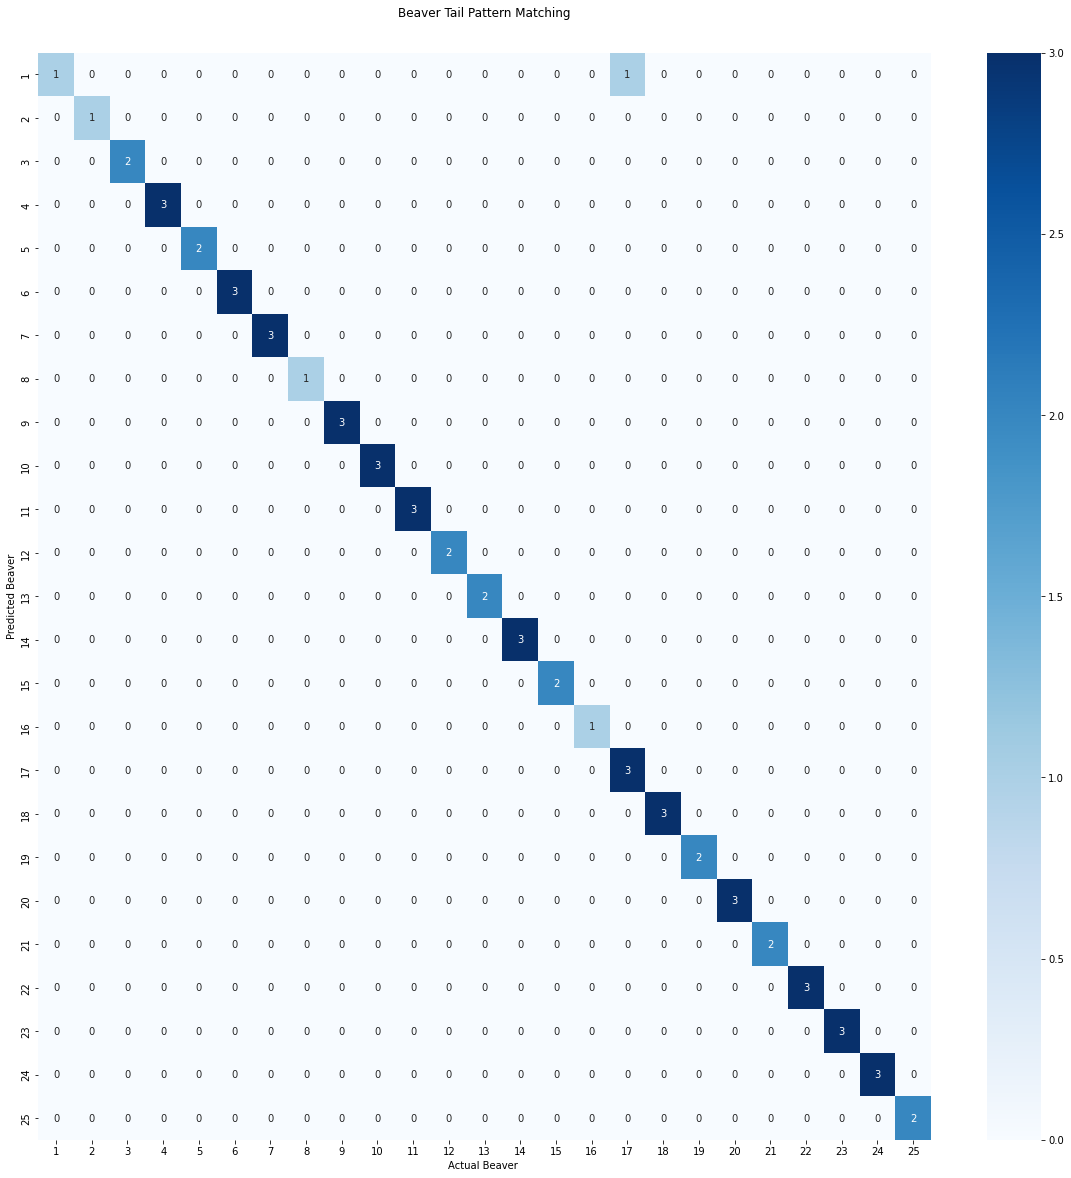

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax_sub = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax_sub)
ax.set_title('Beaver Tail Pattern Matching\n\n')
ax.set_ylabel('Predicted Beaver')
ax.set_xlabel('Actual Beaver ')
# ax.figure(figsize=(20,20))
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(beaver_id)
ax.yaxis.set_ticklabels(beaver_id)
## Display the visualization of the Confusion Matrix.
plt.show()